In [41]:
import numpy as np
from dataclasses import dataclass
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
ary=np.random.RandomState(seed=1).normal(loc=0,scale=0.05,size=(2,4))
y=np.array([[1,],[0]])
print(ary,y)
combo=list(zip(ary,y))
print(combo)
print(combo[0][0])
print(combo[0][1])

[[ 0.08121727 -0.03058782 -0.02640859 -0.05364843]
 [ 0.04327038 -0.11507693  0.08724059 -0.03806035]] [[1]
 [0]]
[(array([ 0.08121727, -0.03058782, -0.02640859, -0.05364843]), array([1])), (array([ 0.04327038, -0.11507693,  0.08724059, -0.03806035]), array([0]))]
[ 0.08121727 -0.03058782 -0.02640859 -0.05364843]
[1]


In [19]:
a=np.array([1,2,3])
b=np.array([4,5,6])
print(a@b)
print(np.float_(0))

32
0.0


In [54]:
# simple perceptron class
@dataclass
class Perceptron:
    eta:float = 0.01
    n_iter:int = 50
    random_state:float = 1

    def fit(self, X, y):
        # initialize wi and b vector
        self.w=np.random.RandomState(seed=self.random_state).normal(0.1,0.05,size=X.shape[1])
        self.b=np.float_(0)
        self.errors=[]

        # loop for n_iter times
        for _ in range(self.n_iter):
            # initialize error
            error=0
            # for each time apply wi to xi(each row)
            for combo in zip(X,y):
                # calc delta b first
                y_hat=self.net_input(combo[0])
                delta_b=self.eta * (combo[-1]-y_hat)
                # then calc delta w
                delta_w=delta_b*combo[0]

                # calc error
                error+=int(delta_b!=0.0)

                # update both w and b
                self.w+=delta_w
                self.b+=delta_b
                # next row 
            self.errors.append(error)
            # next iter

    def net_input(self,X):
        # calculate net input z and return y_hat
        z = self.w @ X + self.b
        y_hat = np.where(z >= 0, 1, 0)
        return y_hat

In [ ]:
# training perceptron on Iris dataset
url=r'C:\Ranco\Python\LGIA\Miscellany\Tutorials\Machine_Learning\iris.data'
df=pd.read_csv(url,header=None,encoding='utf-8')
# keep only the first two Iris flower: setosa and versicolor
df=df.iloc[:100,:]
print(df.head(10))
print(df.tail(10))
# convert string class labels to 1-versicolor and 0-setosa
df.iloc[:,-1]=np.where(df.iloc[:,-1]=='Iris-versicolor',1,0)
print(df.iloc[48:52,:])

<class 'numpy.ndarray'> (100, 2)


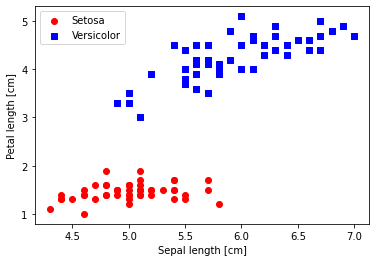

In [49]:
# extract X and y
X=df.iloc[:,[0,2]].values
y=df.iloc[:,-1].values
print(type(X),X.shape)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

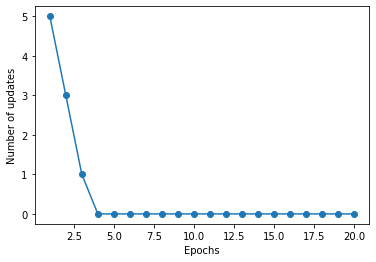

In [60]:
# training
ppn=Perceptron(eta=0.01,n_iter=20)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [58]:
print(ppn.errors)

[5, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
